# Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [42]:
df=pd.read_csv('salary_data_cleaned.csv')

In [17]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,spark,R studio,aws,R_yn,excel,job_simp,seniority,Desc_Length
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,50,1,0,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,39,1,0,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,13,1,1,0,0,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,58,1,0,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,25,1,0,0,0,0,1,data scientist,na,2728


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'spark',
       'R studio', 'aws', 'R_yn', 'excel'],
      dtype='object')

In [27]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [43]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [44]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [45]:
df['seniority'] = df['Job Title'].apply(seniority)

In [46]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [87]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [48]:
#Job description Length
df['Desc_Length'] = df["Job Description"].apply(lambda x:len(x))
df['Desc_Length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Desc_Length, Length: 742, dtype: int64

In [49]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [50]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [51]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [58]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [59]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [61]:
df['hourly']

0      0
1      0
2      0
3      0
4      0
      ..
737    0
738    0
739    0
740    0
741    0
Name: hourly, Length: 742, dtype: int64

In [60]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,spark,R studio,aws,R_yn,excel,Desc_Length,num_comp
count,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.0,0.022911,74.068733,127.183288,74.068733,0.557951,49.389488,0.528302,0.225067,0.001348,0.237197,0.002695,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.0,0.149721,31.869282,46.909006,31.869282,0.496965,53.962906,0.499535,0.417908,0.036711,0.425651,0.051882,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.0,0.000000,10.000000,16.000000,10.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.0,0.000000,52.000000,96.000000,52.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.0,0.000000,69.500000,124.000000,69.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.0,0.000000,91.000000,155.000000,91.000000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,0.0,1.000000,202.000000,306.000000,202.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'spark',
       'R studio', 'aws', 'R_yn', 'excel', 'job_simp', 'seniority',
       'Desc_Length', 'num_comp'],
      dtype='object')

<Axes: >

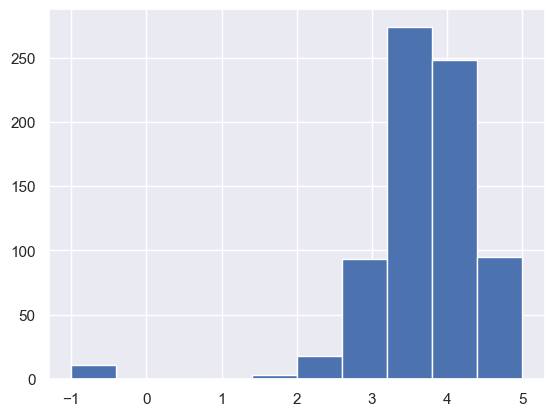

In [63]:
df['Rating'].hist()

<Axes: >

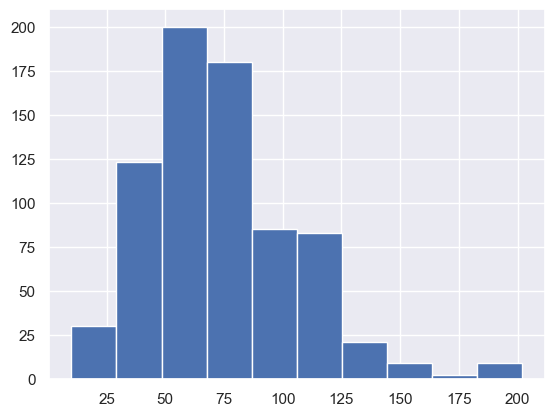

In [64]:
df['avg_salary'].hist()

<Axes: >

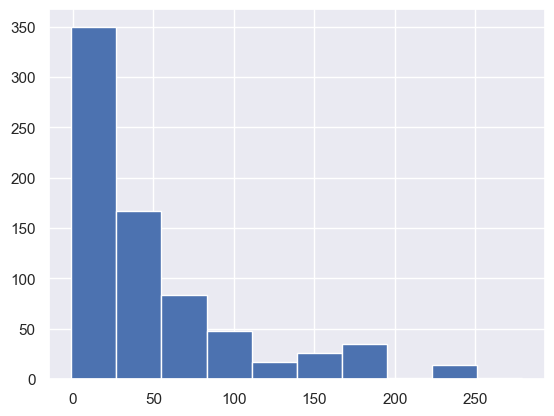

In [65]:
df.age.hist()

<Axes: >

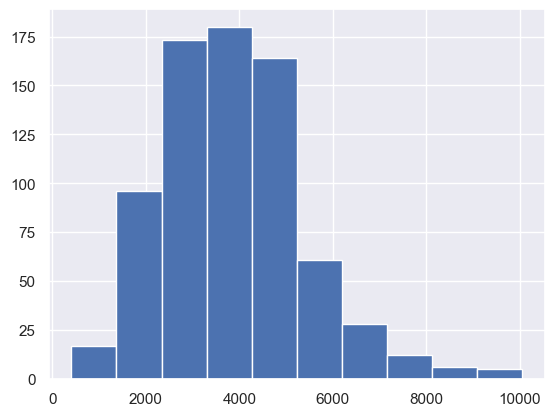

In [68]:
df.Desc_Length.hist()

<Axes: >

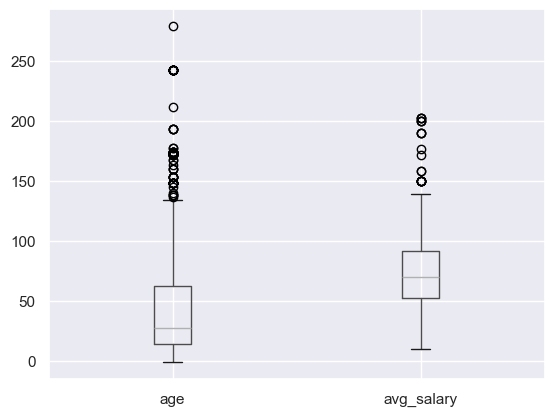

In [70]:
df.boxplot(column = ['age','avg_salary'])

<Axes: >

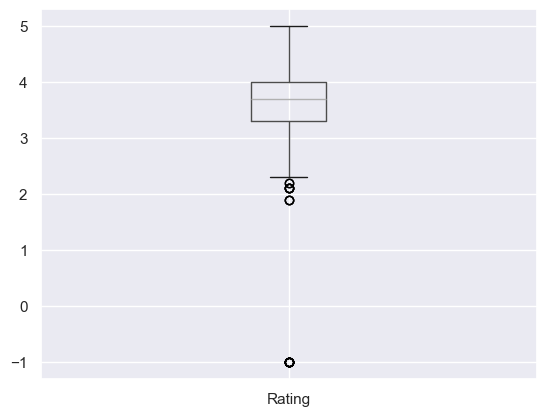

In [71]:
df.boxplot(column = ['Rating'])

In [72]:
df.corr()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,spark,R studio,aws,R_yn,excel,Desc_Length,num_comp
Rating,1.000000,0.332927,NaN,-0.468234,-0.007825,0.027668,-0.007825,0.085033,0.026164,0.144665,0.156982,0.017487,0.117049,-0.004472,-0.036466,-0.012281,0.027190
Founded,0.332927,1.000000,NaN,-0.312761,-0.038513,0.001069,-0.038513,0.171512,0.148091,0.103183,0.066978,0.010857,-0.011123,0.016045,-0.035567,0.083119,0.191265
hourly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employer_provided,-0.468234,-0.312761,NaN,1.000000,0.164277,0.014773,0.164277,-0.081349,-0.113353,-0.107924,-0.082524,-0.005625,-0.000685,-0.007961,0.074129,-0.102218,-0.116665
min_salary,-0.007825,-0.038513,NaN,0.164277,1.000000,0.944186,1.000000,-0.045114,0.001176,0.339425,0.171094,-0.046219,0.168418,-0.040105,-0.062074,0.069666,0.086887
max_salary,0.027668,0.001069,NaN,0.014773,0.944186,1.000000,0.944186,-0.026738,0.031357,0.312443,0.176259,-0.049514,0.169494,-0.039019,-0.052674,0.083228,0.096386
avg_salary,-0.007825,-0.038513,NaN,0.164277,1.000000,0.944186,1.000000,-0.045114,0.001176,0.339425,0.171094,-0.046219,0.168418,-0.040105,-0.062074,0.069666,0.086887
same_state,0.085033,0.171512,NaN,-0.081349,-0.045114,-0.026738,-0.045114,1.000000,-0.164013,0.006975,-0.053139,-0.041272,-0.065070,-0.058407,0.106026,0.062387,-0.102635
age,0.026164,0.148091,NaN,-0.113353,0.001176,0.031357,0.001176,-0.164013,1.000000,-0.097558,-0.101674,-0.007078,-0.033169,-0.016282,0.038471,0.164730,0.129057
python,0.144665,0.103183,NaN,-0.107924,0.339425,0.312443,0.339425,0.006975,-0.097558,1.000000,0.347619,0.034712,0.203221,0.049124,-0.021519,0.019143,0.091470


<Axes: >

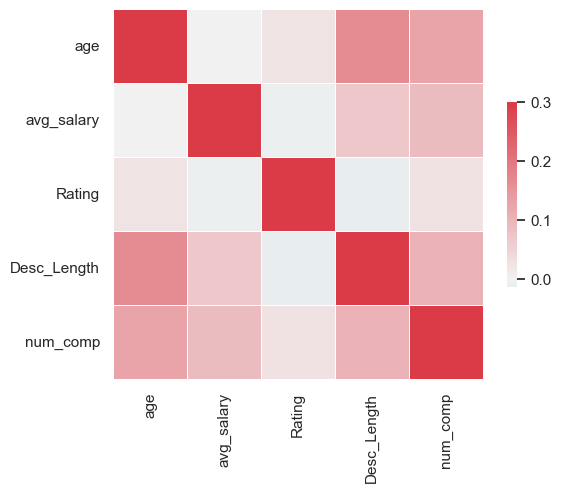

In [74]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','Desc_Length','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python', 'R studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


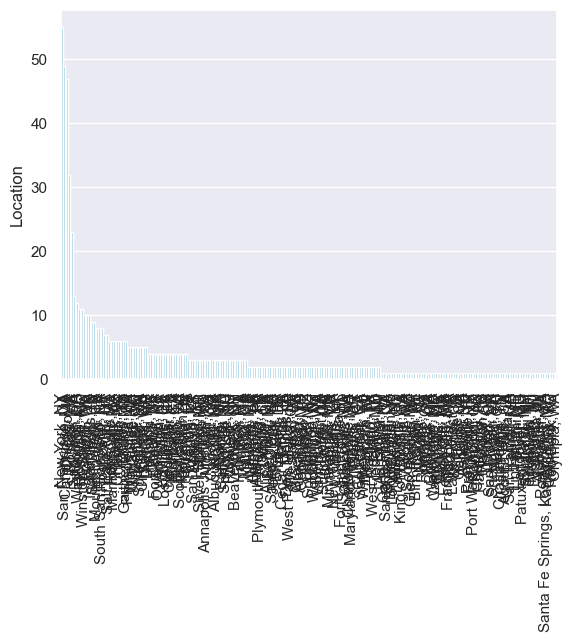

graph for Headquarters: total = 198


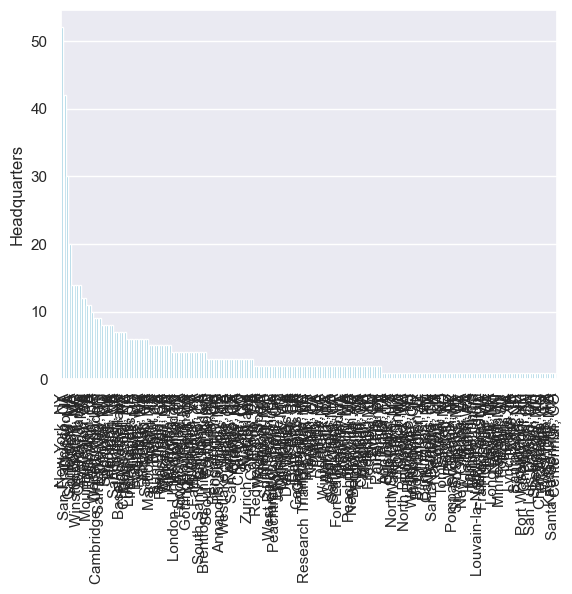

graph for Size: total = 9


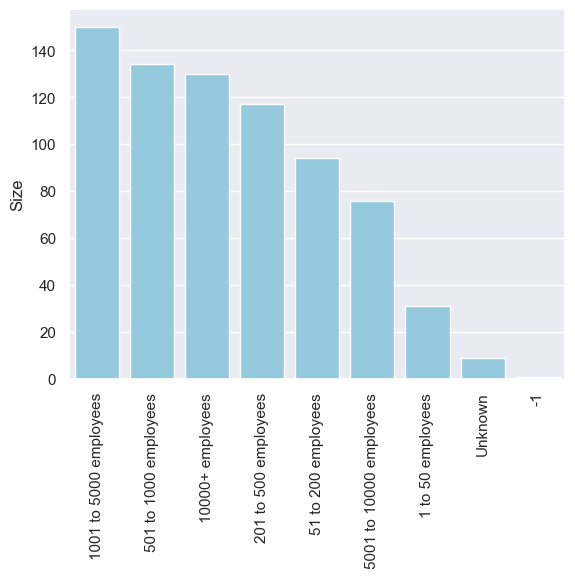

graph for Type of ownership: total = 11


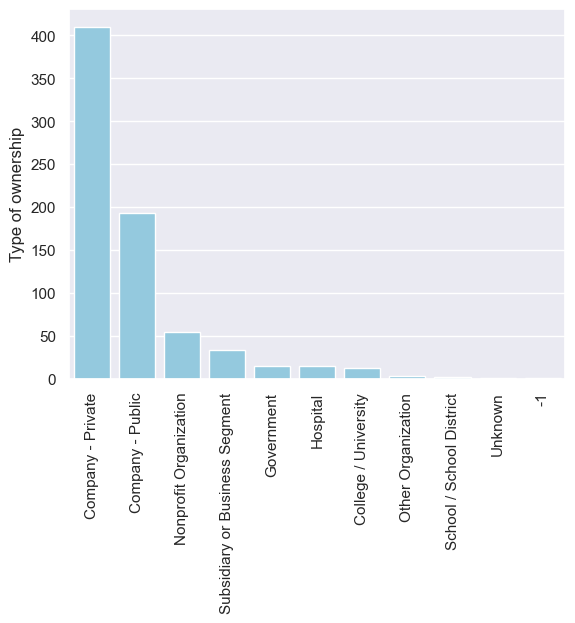

graph for Industry: total = 60


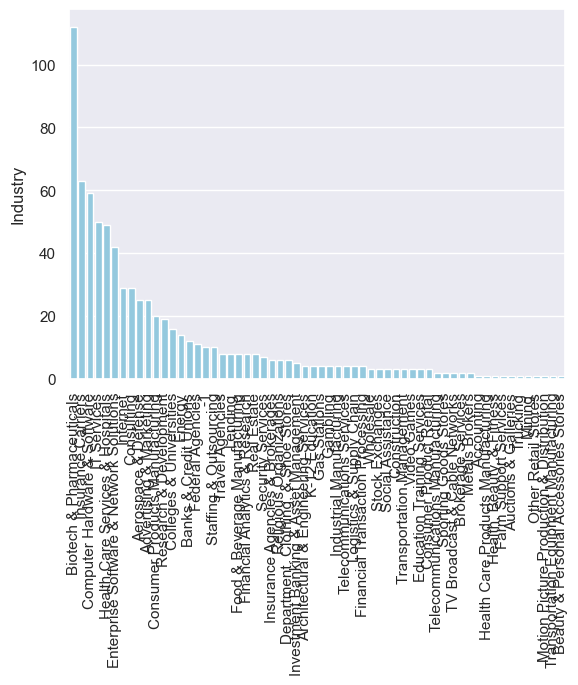

graph for Sector: total = 25


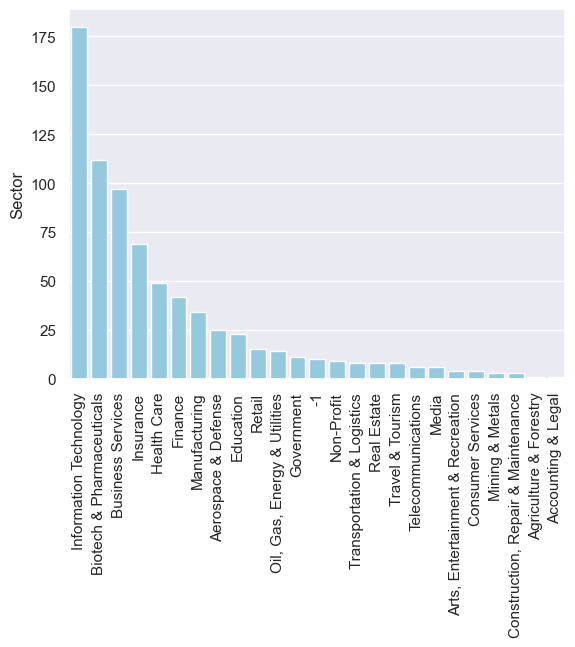

graph for Revenue: total = 14


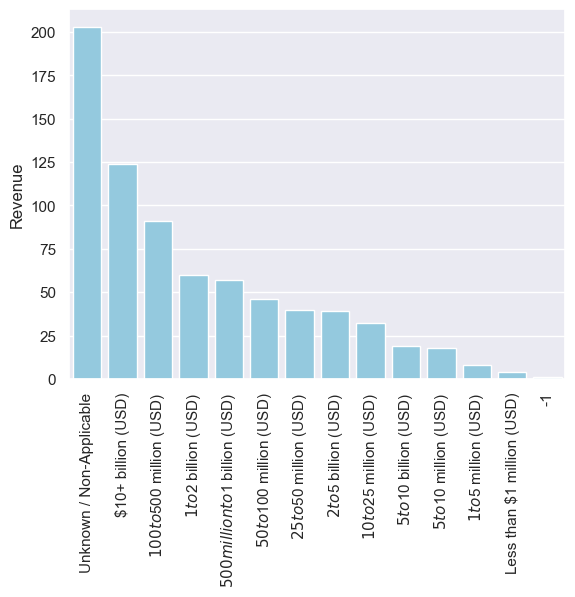

graph for company_txt: total = 343


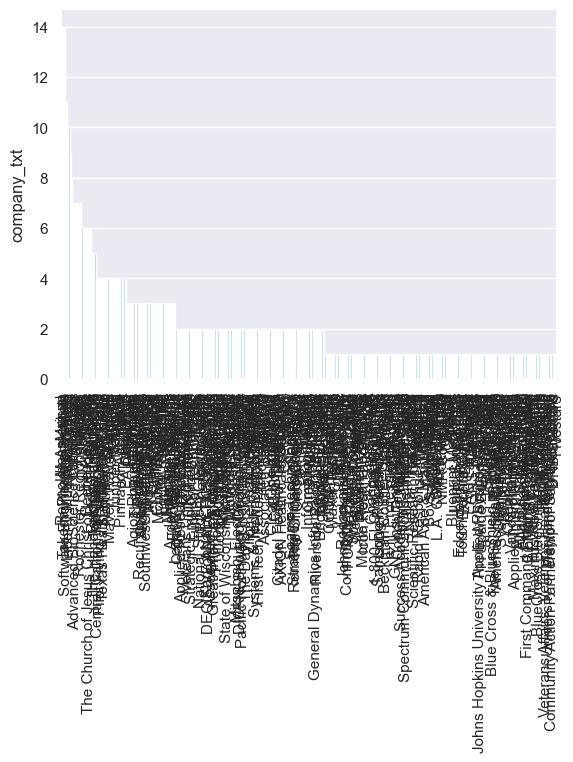

graph for job_state: total = 38


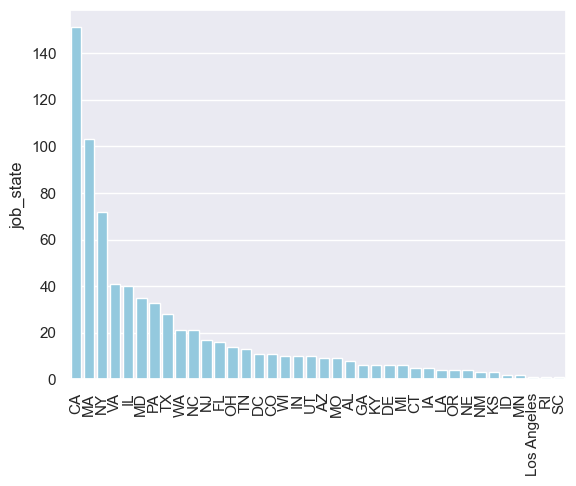

graph for same_state: total = 2


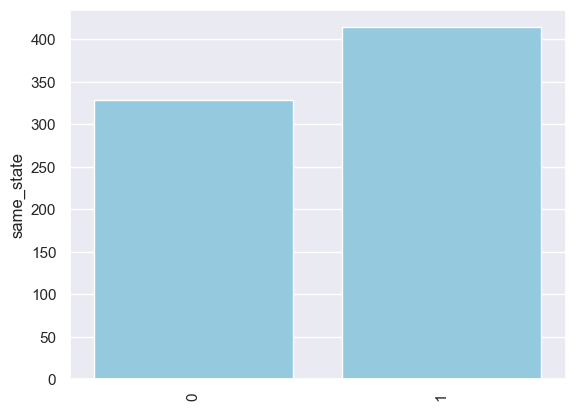

graph for python: total = 2


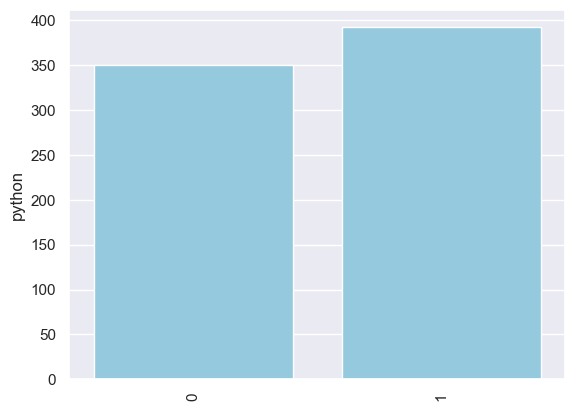

graph for R studio: total = 2


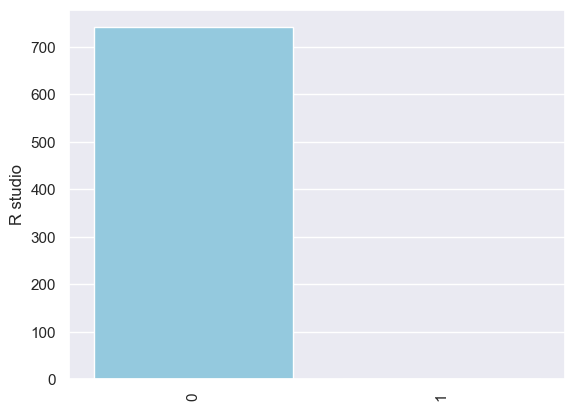

graph for spark: total = 2


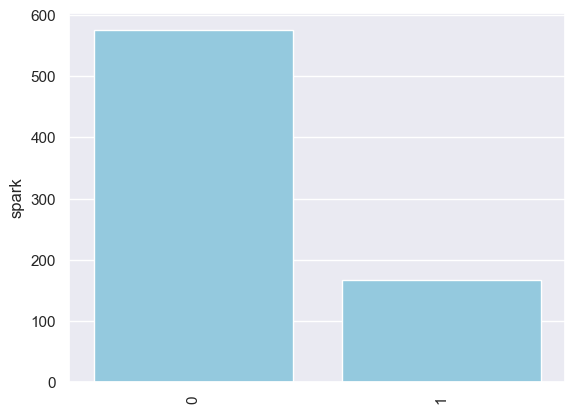

graph for aws: total = 2


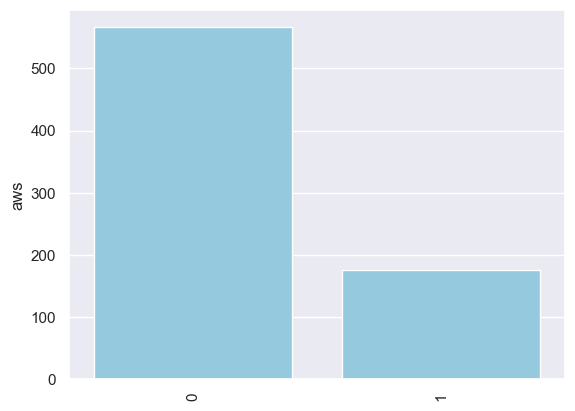

graph for excel: total = 2


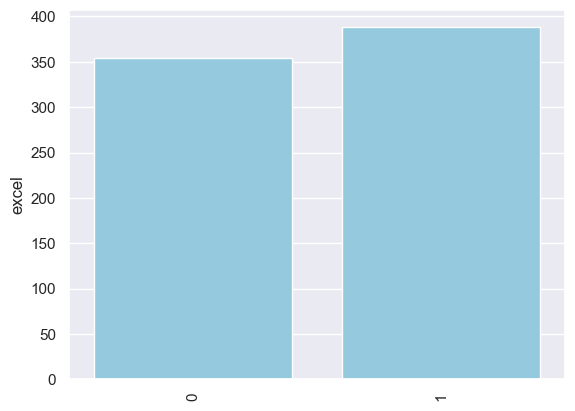

graph for job_simp: total = 7


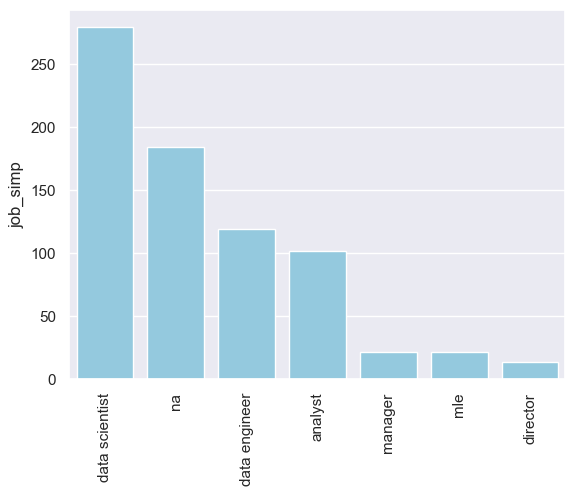

graph for seniority: total = 3


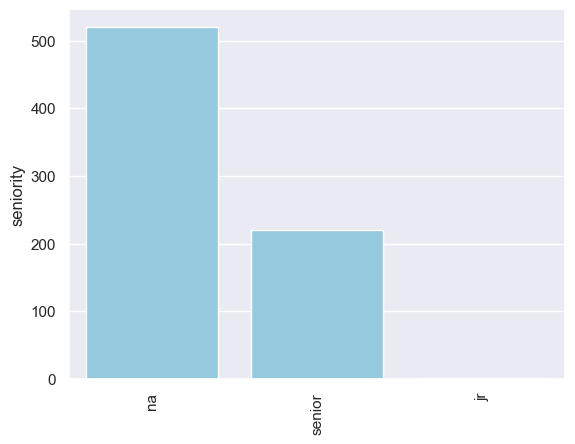

In [88]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, color='skyblue')  # Change the color here
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


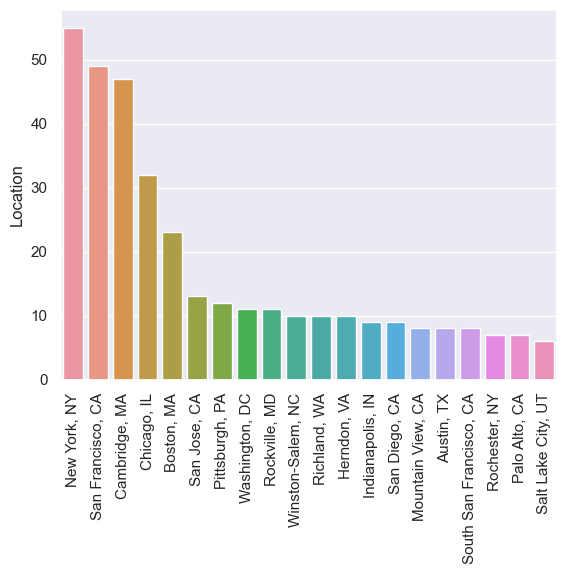

graph for Headquarters: total = 20


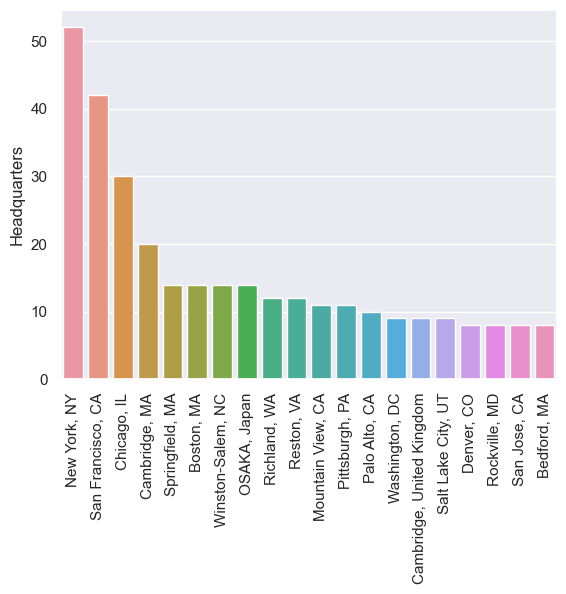

graph for company_txt: total = 20


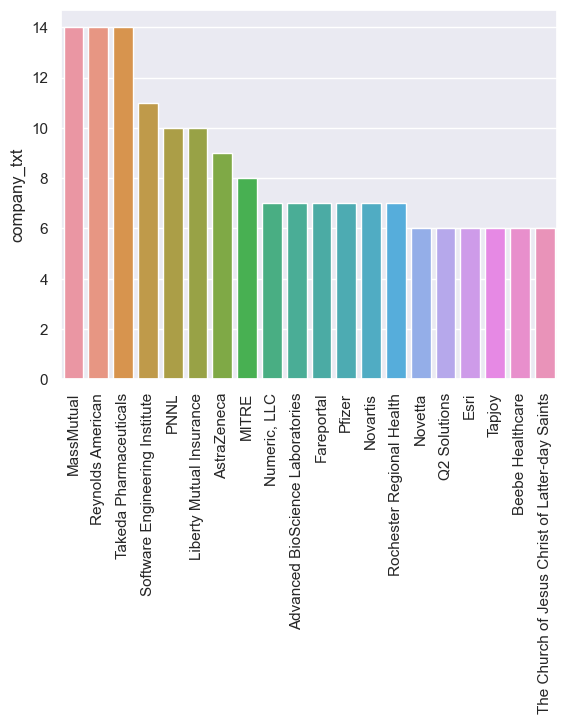

In [79]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [80]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'spark',
       'R studio', 'aws', 'R_yn', 'excel', 'job_simp', 'seniority',
       'Desc_Length', 'num_comp'],
      dtype='object')

In [81]:
pd.pivot_table(df,index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,46.833333
data engineer,76.151261
data scientist,89.881720
director,129.000000
manager,58.090909
mle,90.363636
na,59.625000


In [82]:
pd.pivot_table(df,index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          37.000000
               na          43.337838
               senior      56.777778
data engineer  na          68.548780
               senior      93.000000
data scientist jr          81.000000
               na          80.989247
               senior     107.956522
director       na         129.000000
manager        na          58.090909
mle            na          85.866667
               senior     100.000000
na             na          51.826772
               senior      77.000000

In [92]:
pd.pivot_table(df,index=['job_state','job_simp'], values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
job_state,job_simp,
IL,director,174.166667
CA,mle,134.000000
DC,data scientist,129.600000
NJ,director,124.000000
CA,data scientist,109.985294
...,...,...
CO,na,24.000000
DE,na,21.000000
CO,analyst,20.000000


In [94]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary')

,avg_salary
job_state,
AZ,51.000000
NM,55.000000
GA,61.333333
KY,63.000000
IN,63.000000
CT,63.000000
TN,70.000000
OR,74.666667
TX,76.230769


In [99]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'R_yn', 'spark','aws','excel','Type of ownership','avg_salary']]

In [100]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values ='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 5.0    123.000000
-1.0    118.727273
 2.5     92.500000
 4.1     92.315789
 4.5     86.142857
 3.9     83.968254
 4.4     78.848485
 3.2     77.200000
 4.0     77.127660
 3.5     76.918367
 3.7     76.803279
 4.7     76.322581
 2.6     75.583333
 3.3     75.512821
 4.2     74.461538
 4.3     74.281250
 2.2     72.500000
 4.6     72.100000
 3.8     71.262295
 3.4     68.113636
 2.1     65.200000
 3.0     63.588235
 4.8     63.444444
 1.9     62.333333
 3.6     61.847826
 2.8     60.714286
 3.1     59.600000
 2.3     59.500000
 2.7     55.928571
 2.9     53.888889
 2.4     40.714286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       126.000000
Financial Analytics & Research            111.375000
Health, Beauty, & Fitness                 108.000000
Motion Picture Production & Distribution  102.000000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [103]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [106]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [105]:
pip install wordcloud


     ------------------------------------ 300.6/300.6 kB 258.1 kB/s eta 0:00:00


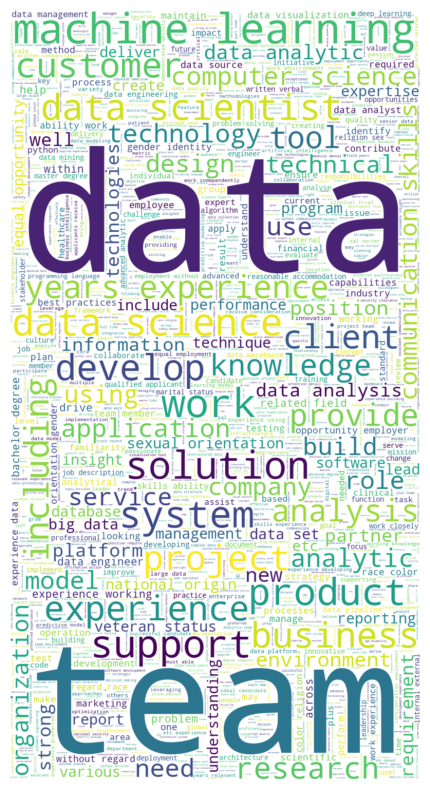

In [112]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Assuming you've already defined 'words' and 'punctuation_stop' function

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(
    background_color="white",
    random_state=1,
    stopwords=STOPWORDS,
    max_words=2000,
    width=800,
    height=1500
)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")  # Passing the word cloud 'wc' here
plt.axis('off')
plt.show()


In [108]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [110]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True